In [2]:
#I used Monte Carlo method to simulate the future stock price outcomes Apple using Python
# Import required libraries
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from pandas_datareader import data as pdr
style.use('ggplot')
Apple = pdr.get_data_yahoo('AAPL', start='2009-01-01')

In [3]:
Apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.791740
2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.909563
2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.861573
2009-01-07,3.303571,3.223571,3.278929,3.250357,7.530488e+08,2.799739
2009-01-08,3.326786,3.215714,3.229643,3.310714,6.735008e+08,2.851728


In [4]:
# To derive the number of days that are covered in our chosen time window 
time_elapsed = (Apple.index[-1] - Apple.index[0]).days

time_elapsed

4444

In [5]:
# To calculate the compound annual growth over the lenght of the dataset and standard deviation.
# The latter will be fed into the simulation
Aggregate_growth = (Apple['Adj Close'][-1] / Apple['Adj Close'][1])

#To annualize the aggregate the growth, first we convert the time elapsed to its year equivalent by:
year_equiv = time_elapsed / 365

# Annualize the aggregate growth by making the inverse of year_equiv its exponent 
CAGR= (Aggregate_growth**(1/year_equiv))-1

# The CAGR calculate is the mean(average) annual growth rate. The stdev of the daily price changes is needed:
std_dev= Apple['Adj Close'].pct_change().std()

#As there are around 252 trading days in a year, this should be scaled by an annualization factor

number_of_trading_days = 252
std_dev_scaled = std_dev * math.sqrt(number_of_trading_days)

#Great! Now we have the two inputs needed to generate the random values in our simulation

print ("CAGR (Mean Annual Returns) :", str(round(CAGR,4)))
print ("Standard Deviation of Return :", str(round(std_dev_scaled,4)))

CAGR (Mean Annual Returns) : 0.3574
Standard Deviation of Return : 0.2885


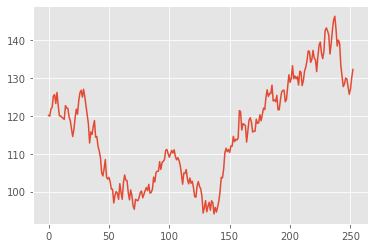

In [17]:
# All set! Let's generate the random values/random shock, and run the Monte Carlo simulation
# Here, I generate random values for 1 year of trading (i.e 252 days), using numpy and assuming normal distribution
daily_return_rand = np.random.normal(CAGR/number_of_trading_days, std_dev_scaled/math.sqrt(number_of_trading_days),number_of_trading_days)+1

#With the series of future of daily returns generated above, 
# I decided to apply same forward-looking intuition to the last stock price in our window. 
# In effect, I would be carrying forward a price prediction for the year that follows

# The resulting distribution is known as random- walk process/prediction
# price_series is a list of successive last prices as we append a new price(old price times 1+random schock)

price_series_last = [Apple['Adj Close'][-1]]

for j in daily_return_rand:
    price_series_last.append(price_series_last[-1] * j)

# Graphical illustration of the random walk process looks like this. Note that price-series_last is a list

plt.plot(price_series_last)
plt.show()

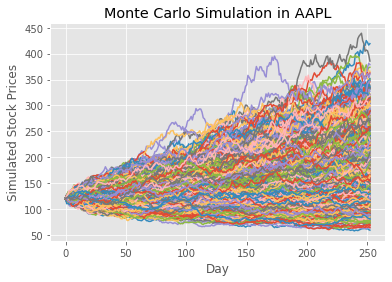

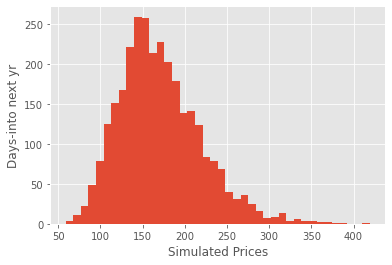

In [13]:
# Given the single random walk prediction above, let's simulate this process over a large sample size 
# That way, based on the law of large numbers, we can begin to approximate the true expected distribution
# Say:
Number_of_trials = 3000

# Let's generate an additional array(not a list) to collect all possible closing prices in last day of window
# We can toss this into a histogram to get a sense of possible outcomes
closing_prices_tr = []

for i in range(Number_of_trials):
    #calculate 3000 random shocks, following normal distribution, using the mean and stdev we calculated above
    daily_return_rand_tr = np.random.normal(CAGR/number_of_trading_days, std_dev_scaled/math.sqrt(number_of_trading_days),
number_of_trading_days)+1 # Creates from first trial to 3000
    price_series_last_tr = [Apple['Adj Close'][-1]] #a) create the list of last prices for 3000 cases

    for j in daily_return_rand_tr:
        #extrapolate price out for the following year
        price_series_last_tr.append(price_series_last_tr[-1] * j) #b) append successive prices unto the list in #a
    
    #append closing prices in last day of window for histogram
    closing_prices_tr.append(price_series_last_tr[-1])           #c) Collects the last prices after each loop completes

# Graphing the resulting Monte Carlo simulations

    #plot all random walk processes for the trials
    plt.plot(price_series_last_tr)
    plt.title('Monte Carlo Simulation in AAPL')
    plt.xlabel('Day')
    plt.ylabel('Simulated Stock Prices')
    


plt.show()

#plot the array in a histogram
plt.hist(closing_prices_tr,bins=40)
plt.xlabel('Simulated Prices')
plt.ylabel('Days-into next yr')

plt.show()

In [9]:
# Analyzing the result by running some interesting statistics on the successive closing prices collected
# Given these, we can calculate the mean of all ending/final prices
# By so doing, we can arrive at the most probable end point

mean_last_price = round(np.mean(closing_prices_tr),2)
print("Expected price: ", str(mean_last_price))

Expected price:  173.74


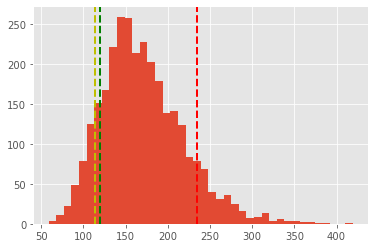

In [15]:
#Finally, we cabn split the distribution into percentiles to let us gauge risk vs reward

#Fetch top 10% of possible outcomes
top_ten = np.percentile(closing_prices_tr,100-10)

#Fetch bottom 10% of possible stock price outcome
bottom_ten = np.percentile(closing_prices_tr,10);

bottom_ten

# Create histogram again to uncover more insights
plt.hist(closing_prices_tr,bins=40)

# To append the top 10% line
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)

#To append the bottom 10% line
plt.axvline(bottom_ten,color='y',linestyle='dashed',linewidth=2)

#To append the current stock price line
plt.axvline(Apple['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)

plt.show()    

In [ ]:
#For the next 1 year, there would likely be more upside potential for Apple stock than downsides, given the current price
# This derives from the expected/mean price observed for the chosen period, which we put at 173.74 dollars. 
# Corroborating this position, is that there is only 10 per cent chance that the price will fall below USD 115.07
# It is noteworthy that these insights and analyses, are based solely on Monte Carlo Simulation of possible future outcomes

#Disclaimer: As there are many more factors (other than historical per cent changes/ random walk), that drive stock prices, 
# I would be wary of making investment decision/recommendations solely off of Monte Carlo Simulation. 
# That said, this offers a thorough illustration of the Monte Carlo simulation, as I continue to explore methods and techniques 
# for better understanding distribution of possible outcomes of events in different knowledge domains

